In [1]:
import pandas as pd
import numpy as np
from math import *

from ggplot import *
%matplotlib inline

In [2]:
x = np.random.uniform(size=10000)
df = pd.DataFrame({'x':x})

In [3]:
df

,x
0,0.072513
1,0.253300
2,0.264132
3,0.497089
4,0.327562
5,0.805644
6,0.554565
7,0.781495
8,0.108404
9,0.084446


stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


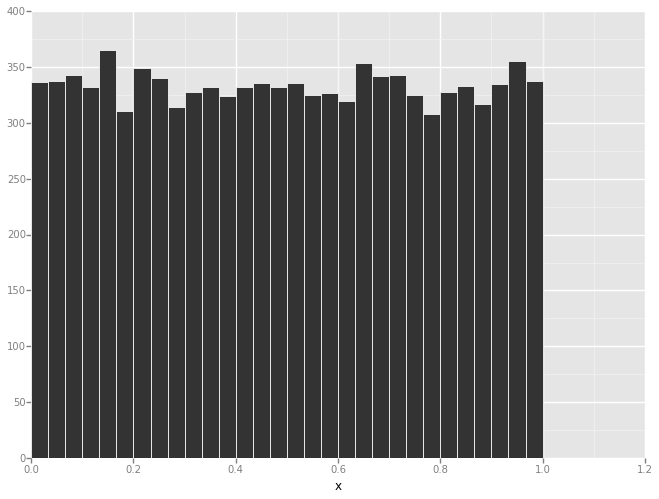

<ggplot: (281500845)>

In [4]:
ggplot(aes(x='x'), data=df) + geom_histogram()

##Inversion sampling example

First find the normalizing constant:
* $f_X(X=x) = cx^2, 0 \leq x \leq 2$
* $1 = c\int_0^2x^2dx$
* $= c[\frac{1}{3}x^3 + d]_0^2$
* $= c[\frac{8}{3} + d - d]$
* $= c[\frac{8}{3}]$
* $f_X(X=x) = \frac{3}{8}x^2, 0 \leq x \leq 2$

Next find the cumulative distribution function:
* $F_X(X=x) = \int_0^x \frac{3}{8}x^2dx$
* $=\frac{3}{8}[\frac{1}{3}x^3 + d]_0^x$
* $=\frac{3}{8}[\frac{1}{3}x^3 + d - d]$
* $=\frac{1}{8}x^3$

We can randomly generate values from a standard uniform distribution and set equal to the CDF. Solve for $x$. Plug the randomly generated values into the equation and plot the histogram or density of $x$ to get the shape of the distribution:
* $u = \frac{1}{8}x^3$
* $x^3 = 8u$
* $x = 2u^{\frac{1}{3}}$

                   x
count  100000.000000
mean        1.499664
std         0.387398
min         0.021286
25%         1.260849
50%         1.587595
75%         1.816844
max         1.999999


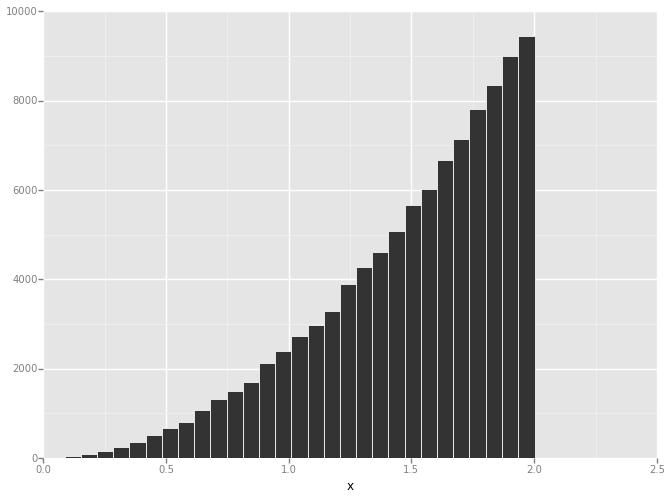

<ggplot: (286026045)>

In [41]:
u = np.random.uniform(size=100000)
x = 2 * u**.3333

df = pd.DataFrame({'x':x})
print df.describe()
ggplot(aes(x='x'), data=df) + geom_histogram()

## Joint Distribution

Find the normalizing constant:
* $f_{X,Y}(X=x,Y=y) = c(2x + y), 0 \leq x \leq 2, 0 \leq y \leq 2$ 
* $1 = \int_0^2 \int_0^2 c(2x + y) dy dx$
* $  = c\int_0^2 [2xy + \frac{1}{2}y^2 + d]_0^2 dx$
* $  = c\int_0^2 [4x + \frac{1}{2}4 + d - d] dx$
* $  = c\int_0^2 (4x + 2) dx$
* $  = c[2x^2 + 2x + d]_0^2$
* $  = c[2(4) + 2(2) + d - d]$
* $  = 12c$
* $c = \frac{1}{12}$
* $f_{X,Y}(X=x,Y=y) = \frac{1}{12}(2x + y), 0 \leq x \leq 2, 0 \leq y \leq 2$

In [5]:
x = np.random.uniform(size=10000)
y = np.random.uniform(size=10000)

Find the marginal distribution:
* $f_{X,Y}(X=x,Y=y) = \frac{1}{12}(2x + y), 0 \leq x \leq 2, 0 \leq y \leq 2$
* $f_X(X=x) = \int_0^2 \frac{1}{12}(2x + y) dy$
* $ = \frac{1}{12}[2xy + \frac{1}{2}y^2 + d]_0^2$
* $ = \frac{1}{12}[4x + 2 + d - d]$
* $ = \frac{4x + 2}{12}$
* $ = \frac{2x + 1}{6}$

Inversion sampling example:
* $F_X(X=x) = \int_0^x \dfrac{2x+1}{6}dx$
* $= \frac{1}{6}[x^2 + x + d]_0^x$
* $= \frac{x(x + 1)}{6}$
* $u = \frac{x^2 + x}{6}$
* $0 = x^2 + x - 6u$
* $x = \frac{-1 \pm \sqrt{1 + 4 \times 6u}}{2}$

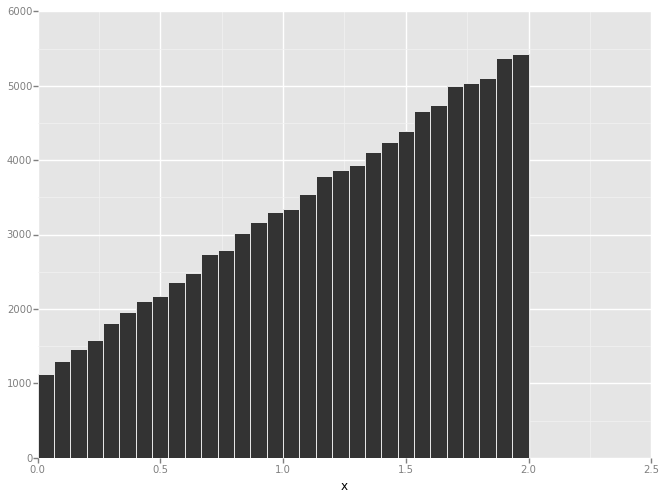

<ggplot: (279378645)>

In [8]:
u = np.random.uniform(size=100000)
x = (-1 + (1 + 24*u)**.5) / 2
df = pd.DataFrame({'x':x})
ggplot(aes(x='x'), data=df) + geom_histogram()